# Data Science Process
1. Setting research goal
2. Retrieving data
3. Data preparation
    - Data cleaning: errors from data entry, impossible values, missing values, outliers
    - Data transformation: aggregating, extrapolating, derived measures, create dummies, reducing number of variables
    - Combining data: merge/join datasets, set operators, creating views
4. Data exloration: simple graphs, combined graph, link and brush, nongraphical techniques
5. Data modeling: model and variable selection, model execution, model diagnostic and comparison
6. Presentation and automation

Source: Introducing Data Science (Cielen, Meysman, Ali)

------------
# Prediksi Berat Ikan Menggunakan _Multiple Linear Regression_
> Kelompok 6
* 175150200111013 Anindya Celena Khansa Kirana
* 175150200111068 Annisa Nuri Nabila
* 175150200111079 Rafid Ardito
* 175150200111025 Immanuel Juventius Todo Guring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Retrieving Data

Data yang kami gunakan adalah data 7 spesies ikan untuk penjualan pasar. Data ini didapatkan dari SAS OnDemand for Academics.

In [2]:
df = pd.read_csv('fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Understanding Data

|             | Deskripsi
| ------------|--------------
| Species     | Jenis ikan 
| Weight      | Berat ikan dalam gram   
| Length1     | Panjang ikan secara vertikal dalam cm
| Length2     | Panjang ikan secara diagonal dalam cm
| Length3     | Panjang ikan secara silang dalam cm
| Height      | Tinggi ikan dalam cm
| Width       | Lebar diagonal ikan dalam cm

In [3]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.shape

(159, 7)

In [5]:
df['Species'].value_counts()
# imbalanced data

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

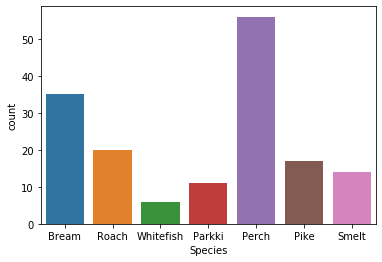

In [6]:
sns.countplot(data=df, x='Species')

In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Dari penjelasan diatas, terdapat nilai minimum 0 pada variabel Weight yang mana nilai tersebut tidak mungkin.

## Data Preparation

##### removing impossible values

In [8]:
df[df.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [9]:
df = df.drop([40], axis=0)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


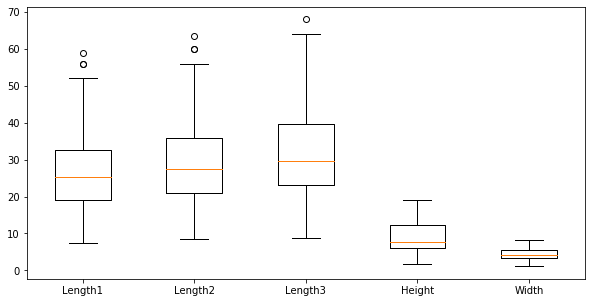

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
dataset = [df['Length1'], df['Length2'], df['Length3'], df['Height'], df['Width']]
labels = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
ax.boxplot(dataset, labels=labels)
plt.show()

The circles show that there's an outlier on Length1, Length2, and Length3.

In [11]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### removing outlier

In [12]:
def outlier(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [13]:
# Outlier on Length1
outlier(df['Length1'])

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [14]:
# Outlier on Length2
outlier(df['Length2'])

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [15]:
# Outlier on Length3
outlier(df['Length3'])

144    68.0
Name: Length3, dtype: float64

In [16]:
df2 = df.drop([142,143,144], axis=0)
df2.shape

(155, 7)

In [17]:
df2.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,377.638065,25.698710,27.833548,30.621290,8.967102,4.382326
std,319.144511,9.133355,9.806718,10.711621,4.333722,1.675564
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.926950,3.385650
50%,272.000000,25.000000,27.000000,29.300000,7.680000,4.247600
75%,615.000000,32.250000,35.000000,39.450000,12.379300,5.472750
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


Tabel diatas merupakan penjelasan statistikal dari df2 (data yang sudah dihilangkan outliernya)

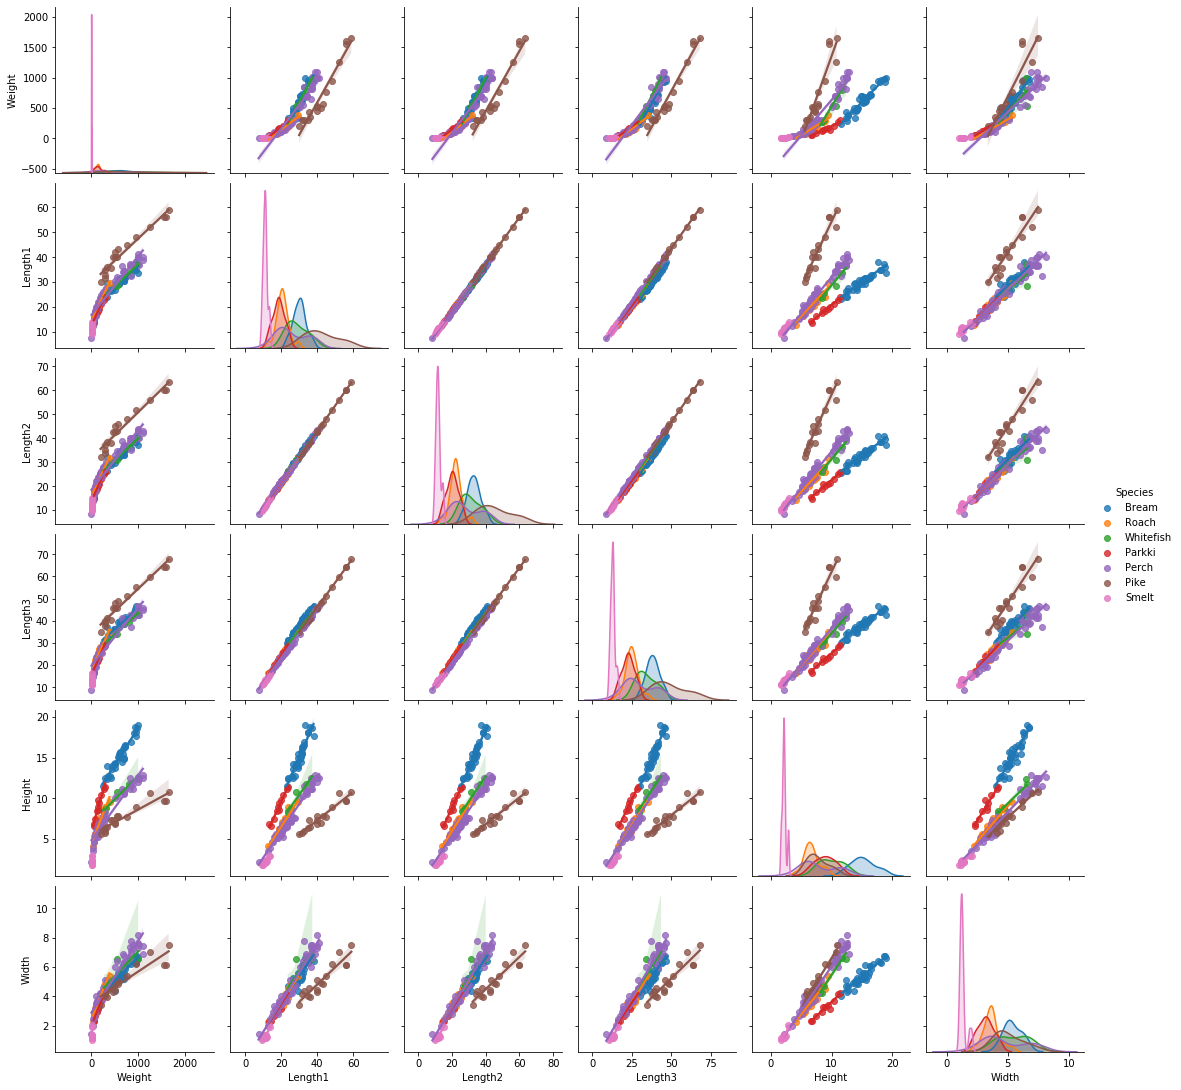

In [18]:
sns.pairplot(df, kind='reg', hue='Species')

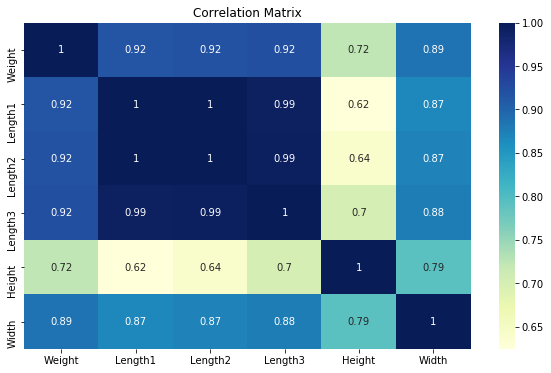

In [19]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

Heatmap diatas merupakan visualisasi dari korelasi antara variabel-variabel.

### Rumus _Multiple Linear Regression_
$ y = a + b1*x1 + b2*x2 + ... + bn*xn $

> $ a = (sum(y) * sum(x^2)) - (sum(x) * sum(x * y)) / (n * sum(x^2)) - (sum(x)^2) $
> $ b = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x^2) - sum(x)^2) $

_WHERE:_ <br>
`x = variabel prediktor/independen
 y = variabel response/dependen
 a = konstanta
 b = koefisien regresi/kemiringan (besaran y yang ditimbulkan oleh x)`

x1 = length1; x2 = length2; x3 = length3; x4 = height; x5 = width

## Data Modelling

### Model 1
##### without outlier removal

In [20]:
df = pd.get_dummies(df)
df.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0
158,19.9,13.8,15.0,16.2,2.9322,1.8792,0,0,0,0,0,1,0


In [21]:
from sklearn.preprocessing import MinMaxScaler

# min-max scaler/standarization
scaler = MinMaxScaler()
var = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
df[var] = scaler.fit_transform(df[var])
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,0.304854,0.309091,0.358108,0.568334,0.418978,1,0,0,0,0,0,0
1,290.0,0.320388,0.325455,0.378378,0.624055,0.459235,1,0,0,0,0,0,0
2,340.0,0.318447,0.329091,0.376689,0.618123,0.514279,1,0,0,0,0,0,0
3,363.0,0.365049,0.374545,0.417230,0.638566,0.480365,1,0,0,0,0,0,0
4,430.0,0.368932,0.374545,0.425676,0.621966,0.576004,1,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

# set dependent and independent values
x = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

a = pd.DataFrame(lin_reg.intercept_, index=['  Intercept (a)'], columns=[''])
b = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient (b)'])
print(b.T,a)

                     Length1      Length2      Length3      Height       Width
Coefficient (b)  3304.052848 -1128.975249 -1025.269623  360.434604  240.384916                            
  Intercept (a) -274.162364


##### Persamaan linear dari model:

In [24]:
print('y = {} + {}*{} + {}*{} + {}*{} + {}*{} + {}*{}'.format(
        a['']['  Intercept (a)'],
        b['Coefficient (b)'][0], x['Length1'][0],
        b['Coefficient (b)'][1], x['Length2'][0],
        b['Coefficient (b)'][2], x['Length3'][0],
        b['Coefficient (b)'][3], x['Height'][0],
        b['Coefficient (b)'][4], x['Width'][0]))

y = -274.1623638497521 + 3304.0528481833167*0.30485436893203877 + -1128.9752485823153*0.3090909090909091 + -1025.269622531586*0.35810810810810806 + 360.4346043275579*0.568334049197265 + 240.38491624232188*0.41897834912043297


##### Prediksi dari data train

In [25]:
from sklearn.metrics import mean_squared_error

# predict on train data
y_pred = lin_reg.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
score_train= lin_reg.score(x_train, y_train)

print('Train Data\nRMSE\t\t{}'.format(rmse_train))
print('R2 Score\t{}'.format(score_train))

Train Data
RMSE		123.00251957733444
R2 Score	0.878628537924283


##### Prediksi dari data test

In [26]:
# predict on test data
y_pred_test = lin_reg.predict(x_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_test))
score_model= lin_reg.score(x_test, y_test)

print('Test Data\nRMSE\t\t{}'.format(rmse_model))
print('R2 Score\t{}'.format(lin_reg.score(x_test, y_test)))

Test Data
RMSE		113.26588391122883
R2 Score	0.9044316660758351


In [27]:
df_model1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
df_model1.T

,129,46,135,157,91,29,97,99,96,141,...,12,9,31,82,52,140,126,147,146,76
Actual,300.000000,140.000000,510.000000,19.700000,130.000000,1000.000000,145.000000,180.000000,225.000000,1250.000000,...,500.000000,500.000000,955.000000,110.000000,290.000000,950.000000,1000.000000,7.000000,7.500000,70.000000
Predicted,439.335388,199.994907,697.572538,-81.929749,180.847736,770.134909,237.982421,260.848055,253.731492,1110.778793,...,523.648755,534.857337,782.531352,135.623021,336.264704,976.938038,926.912292,-197.591822,-196.465439,23.183937


Text(0.5, 1.0, 'Actual vs Predicted Weight')

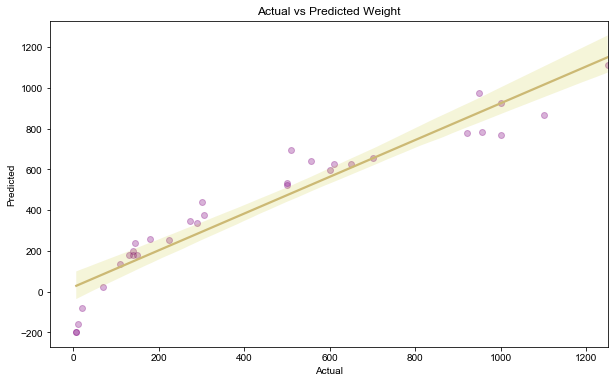

In [28]:
sns.regplot(y_test, y_pred_test, line_kws={'color':'y'}, scatter_kws={'color':'purple', 'alpha':0.3})
sns.set(style='whitegrid')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Weight')

### Model 2
##### with outlier removal

In [29]:
df2 = pd.get_dummies(df2)
df2.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0
158,19.9,13.8,15.0,16.2,2.9322,1.8792,0,0,0,0,0,1,0


In [30]:
var = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
df2[var] = scaler.fit_transform(df2[var])
df2.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,0.352809,0.357143,0.416503,0.568334,0.418978,1,0,0,0,0,0,0
1,290.0,0.370787,0.376050,0.440079,0.624055,0.459235,1,0,0,0,0,0,0
2,340.0,0.368539,0.380252,0.438114,0.618123,0.514279,1,0,0,0,0,0,0
3,363.0,0.422472,0.432773,0.485265,0.638566,0.480365,1,0,0,0,0,0,0
4,430.0,0.426966,0.432773,0.495088,0.621966,0.576004,1,0,0,0,0,0,0


In [31]:
# set dependent and independent values
x2 = df2[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y2 = df2['Weight']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [32]:
lin_reg.fit(x2_train, y2_train)

a2 = pd.DataFrame(lin_reg.intercept_, index=['  Intercept (a)'], columns=[''])
b2 = pd.DataFrame(lin_reg.coef_, x2.columns, columns=['Coefficient (b)'])
print(b2.T,a2)

                     Length1      Length2      Length3      Height       Width
Coefficient (b)  5392.871172 -3002.799018 -1878.686784  616.742607  395.490553                            
  Intercept (a) -244.404665


##### Persamaan regresi dari model:

In [33]:
print('y = {} + {}*{} + {}*{} + {}*{} + {}*{} + {}*{}'.format(
        a2['']['  Intercept (a)'],
        b2['Coefficient (b)'][0], x2['Length1'][0],
        b2['Coefficient (b)'][1], x2['Length2'][0],
        b2['Coefficient (b)'][2], x2['Length3'][0],
        b2['Coefficient (b)'][3], x2['Height'][0],
        b2['Coefficient (b)'][4], x2['Width'][0]))

y = -244.40466542083846 + 5392.87117197081*0.352808988764045 + -3002.799018398458*0.35714285714285704 + -1878.6867837097807*0.4165029469548134 + 616.7426069331509*0.568334049197265 + 395.49055304595396*0.41897834912043297


##### Prediksi dari data train

In [34]:
# predict on train data
y2_pred = lin_reg.predict(x2_train)
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_pred))
score_train2= lin_reg.score(x2_train, y2_train)

print('Train Data\nRMSE\t\t{}'.format(rmse_train2))
print('R2 Score\t{}'.format(score_train2))

Train Data
RMSE		100.64166990967077
R2 Score	0.8968624395247585


##### Prediksi dari data test

In [35]:
# predict on test data
y2_pred_test = lin_reg.predict(x2_test)
rmse_model2 = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
score_model2= lin_reg.score(x2_test, y2_test)

print('Test Data\nRMSE\t\t{}'.format(rmse_model2))
print('R2 Score\t{}'.format(score_model2))

Test Data
RMSE		89.22873822340162
R2 Score	0.9287609516086527


In [36]:
df_model2 = pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred_test})
df_model2.T

,82,146,31,29,119,61,94,151,157,69,...,12,9,24,70,132,96,46,87,85,127
Actual,110.000000,7.500000,955.000000,1000.000000,850.000000,55.000000,150.000000,10.0000,19.700000,200.00000,...,500.00000,500.00000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.00000,1000.00000
Predicted,130.426749,-162.270786,768.080172,781.185714,791.509169,55.638805,159.806185,-126.5386,-64.241748,321.70277,...,513.09512,547.93183,637.190912,385.822521,507.365934,260.670497,203.778212,148.069705,160.36853,936.78926


Text(0.5, 1.0, 'Actual vs Predicted Weight')

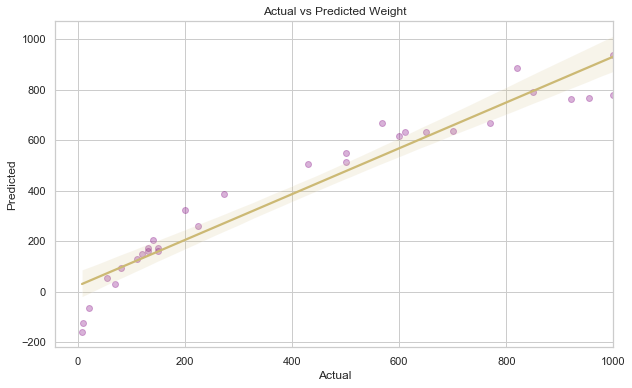

In [37]:
sns.regplot(y2_test, y2_pred_test, line_kws={'color':'y'}, scatter_kws={'color':'purple', 'alpha':0.3})
sns.set(style='whitegrid')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Weight')

## Perbandingan Metrics

In [38]:
compareTrain = pd.DataFrame([{'RMSE':rmse_train, 'R2 Score':score_train}, {'RMSE':rmse_train2, 'R2 Score':score_train2}], 
                       index=[['Train', 'Train'],['Model 1', 'Model 2']])
compareTest = pd.DataFrame([{'RMSE':rmse_model, 'R2 Score':score_model}, {'RMSE':rmse_model2, 'R2 Score':score_model2}], 
                       index=[['Test', 'Test'], ['Model 1', 'Model 2']])

In [39]:
compareTrain.append(compareTest)

RMSE  R2 Score
Train Model 1  123.002520  0.878629
      Model 2  100.641670  0.896862
Test  Model 1  113.265884  0.904432
      Model 2   89.228738  0.928761